In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Open the .csv files
X_train = pd.read_csv('/Users/arnav/Desktop/MachineLearning/ML_CSE343 Project/train_tfidf.csv')
X_test = pd.read_csv('/Users/arnav/Desktop/MachineLearning/ML_CSE343 Project/test_tfidf.csv')

X_train = X_train.drop(['Unnamed: 0'], axis=1)
X_test = X_test.drop(['Unnamed: 0'], axis=1)

# Check the shape of the data
print(X_train.shape)
print(X_test.shape)

(22500, 1000)
(7500, 1000)


In [3]:
# Extract the features into a numpy array
X_train = X_train.values
X_test = X_test.values

In [4]:
# Open the labels
y_train_df = pd.read_csv('/Users/arnav/Desktop/MachineLearning/ML_CSE343 Project/CSE343-ML-Project/Data/Preprocessed-Data/train_labels.csv')
y_test_df = pd.read_csv('/Users/arnav/Desktop/MachineLearning/ML_CSE343 Project/CSE343-ML-Project/Data/Preprocessed-Data/test_labels.csv')

# Check the shape of the labels
print(y_train_df.shape)
print(y_test_df.shape)

(22500, 1)
(7500, 1)


In [5]:
# Convert class to non_suicide = 0 and suicide = 1
y_train_temp = y_train_df['class'].values
y_test_temp = y_test_df['class'].values

# Check the shape of the labels
print(y_train_temp.shape)
print(y_test_temp.shape)

(22500,)
(7500,)


In [6]:
# Making the Labels Numeric
y_train = np.array([0 if label == "non-suicide" else 1 for label in y_train_temp])
y_test = np.array([0 if label == "non-suicide" else 1 for label in y_test_temp])

# Check the shape of the labels
print(y_train.shape)
print(y_test.shape)


(22500,)
(7500,)


In [7]:
# Standard Preprocessing
# Check the mean and standard deviation of the data
print(np.mean(X_train), np.std(X_train))

0.004686103127390068 0.0312074847455884


In [8]:
# Perform Grid Search to find the best parameters for Logistic Regression

# Define hyperparameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Initialize Logistic Regression
clf = LogisticRegression(max_iter=1000)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)


# Best hyperparameters
best_parameters = grid_search.best_params_
print("Best Parameters:", best_parameters)

# Optionally, you can retrieve the best estimator directly:
best_estimator = grid_search.best_estimator_


Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.8s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.8s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.8s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.8s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.8s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.8s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.8s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.8s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.1s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.2s
[CV] END ....................C=0.001, penalty=l1, solver=sag; total time=   0.2s
[CV] END ....................C=0.001, penalty=l

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time= 7.2min
[CV] END .....................C=1000, penalty=l2, solver=sag; total time=  43.9s
[CV] END .....................C=1000, penalty=l2, solver=sag; total time= 1.1min
[CV] END .....................C=1000, penalty=l2, solver=sag; total time= 1.6min
[CV] END ....................C=1000, penalty=l2, solver=saga; total time= 1.4min
[CV] END ....................C=1000, penalty=l2, solver=saga; total time= 1.2min
[CV] END ....................C=1000, penalty=l2, solver=saga; total time= 2.4min
[CV] END ....................C=1000, penalty=l1, solver=saga; total time= 6.6min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=1000, penalty=l1, solver=saga; total time= 6.8min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=1000, penalty=l1, solver=saga; total time= 6.8min
[CV] END ....................C=1000, penalty=l2, solver=saga; total time= 2.4min
[CV] END ....................C=1000, penalty=l2, solver=saga; total time= 2.2min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
105 fits failed out of a total of 350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [9]:
# Predict the labels of the test set
y_pred = best_estimator.predict(X_test)

# Print the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print AUC score
print("AUC Score:", roc_auc_score(y_test, y_pred))

# Print the precision and recall, among other metrics
print("Precision-Recall Metrics:\n", classification_report(y_test, y_pred, digits=3))

# Print weighted F1-score
print("Weighted F1-score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.9150666666666667
Confusion Matrix:
[[3429  279]
 [ 358 3434]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      3708
           1       0.92      0.91      0.92      3792

    accuracy                           0.92      7500
   macro avg       0.92      0.92      0.92      7500
weighted avg       0.92      0.92      0.92      7500

AUC Score: 0.9151739994264881
Precision-Recall Metrics:
               precision    recall  f1-score   support

           0      0.905     0.925     0.915      3708
           1      0.925     0.906     0.915      3792

    accuracy                          0.915      7500
   macro avg      0.915     0.915     0.915      7500
weighted avg      0.915     0.915     0.915      7500

Weighted F1-score: 0.9150672630876725


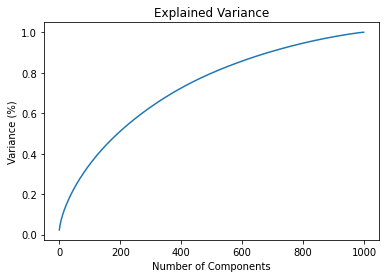

In [50]:
# Perform PCA on the data and plot the explained variance ratio and mark 85% on the graph
pca = PCA()
pca.fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

In [52]:
# Perform PCA on the data and extract the features that explain 85% of the variance
pca = PCA(n_components=0.85)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [53]:
# Run Logistic Regression 
# Initialize Logistic Regression
lr = LogisticRegression()

# Fit the model on the training data
lr.fit(X_train, y_train)

# Predict on the test data
y_pred = lr.predict(X_test)

In [54]:
# Print the accuracy score
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Print AUC score
print("AUC Score:", roc_auc_score(y_test, y_pred))

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.9126666666666666
Confusion Matrix:
 [[3428  280]
 [ 375 3417]]
AUC Score: 0.912797594663608
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      3708
           1       0.92      0.90      0.91      3792

    accuracy                           0.91      7500
   macro avg       0.91      0.91      0.91      7500
weighted avg       0.91      0.91      0.91      7500



In [55]:
# Print weighted F1-score
print("Weighted F1-score:", f1_score(y_test, y_pred, average='weighted'))

Weighted F1-score: 0.9126650442039174


Precision-Recall Metrics:
               precision    recall  f1-score   support

           0      0.901     0.924     0.913      3708
           1      0.924     0.901     0.913      3792

    accuracy                          0.913      7500
   macro avg      0.913     0.913     0.913      7500
weighted avg      0.913     0.913     0.913      7500



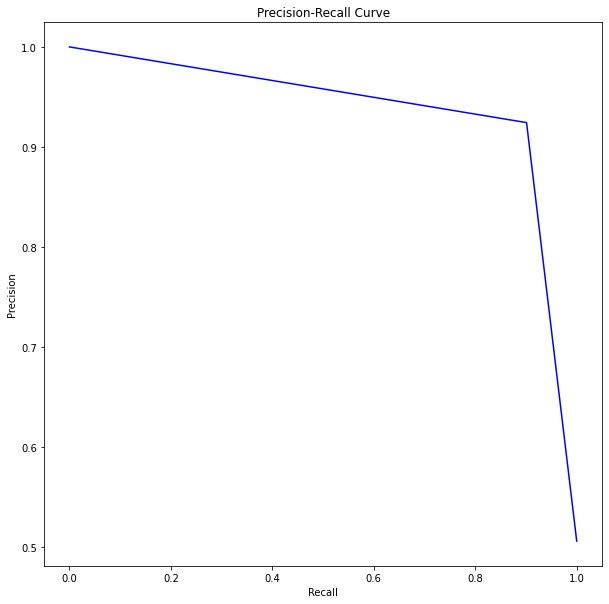

In [59]:
# Print the precision and recall, among other metrics
print("Precision-Recall Metrics:\n", classification_report(y_test, y_pred, digits=3))

# # Plot the ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# roc_auc = auc(fpr, tpr)

# plt.figure(figsize=(10, 10))
# plt.title('ROC Curve')
# plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
# plt.legend(loc='lower right')

# Plot the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(10, 10))
plt.title('Precision-Recall Curve')
plt.plot(recall, precision, 'b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()